In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

In [193]:
df = pd.read_csv(r'./dados/A155957189_28_143_208.csv', encoding= 'ISO-8859-1', sep=';', error_bad_lines=False, skiprows=3, skipfooter=12, thousands='.',decimal=',', engine = 'python')

In [194]:
a = df['Unidade da Federação'].str.split(' ', 1, expand = True)
# df.insert(value = a[0], column = 'Número do Estado', loc = 0)
df['Unidade da Federação'] = a[1]

In [195]:
df.describe()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,304952.77,788145.26,2440162.96,5517354.05,12337159.42,76343108.00,23821310.52,25879711.67,26213027.10,26218488.77,...,57693175.63,56199394.29,53909030.54,53910192.75,53735469.44,53772909.13,49474107.60,38992424.23,24163712.88,6388205992.19
std,392806.00,1071747.56,3421972.10,7767711.29,16345863.65,201153948.03,34459305.08,34816150.69,34788035.48,35063318.56,...,74371252.47,73093453.56,71118985.61,69373610.63,69068920.54,68845990.27,66840558.46,54697718.60,35701207.83,8572046016.26
min,4113.76,11858.63,43852.67,226661.18,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,2536642.73,2702550.32,2533445.46,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,309860092.59
25%,46580.42,139423.94,505778.42,1410610.81,3650090.00,8257222.37,7932273.51,8926011.35,8764559.62,9229049.70,...,18911546.95,17696633.84,17457132.47,17768222.52,18058137.04,18157759.16,15959158.48,12110517.03,5765750.92,2048683858.60
50%,179395.82,418053.58,1152115.25,2406035.32,5949408.99,16568724.64,10215956.80,12262049.08,12453466.98,11900817.00,...,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,24439059.57,19004029.87,13069564.31,2660122027.15
75%,392985.52,969999.75,2625635.63,5915821.61,13394973.35,52147797.62,26932691.98,30400866.02,30982776.89,31304997.26,...,76595078.72,75576130.66,70901455.85,71675268.89,75629792.23,75298930.91,63803715.63,51486957.47,28090801.73,8208100569.65
max,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,41396408548.81


In [196]:
df.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

In [197]:
usaveis = df.mean().index.tolist()
usaveis.insert(0, 'Unidade da Federação')
#usaveis

In [198]:
usaveis = df[usaveis]
usaveis = usaveis.set_index('Unidade da Federação')

In [199]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [200]:
usaveis.loc['Espírito Santo']

2007/Ago        57408.11
2007/Set       284224.80
2007/Out      1152115.25
2007/Nov      2296383.23
2007/Dez      5724199.54
                ...     
2020/Dez     40500910.57
2021/Jan     33767261.13
2021/Fev     25669612.63
2021/Mar     15606368.11
Total      3405850698.58
Name: Espírito Santo, Length: 165, dtype: float64

In [201]:
usaveis = usaveis.drop('Total', axis = 1) #Usamos axis = 1 pois estamos buscando no eixo das linhas e não das colunas

<AxesSubplot:>

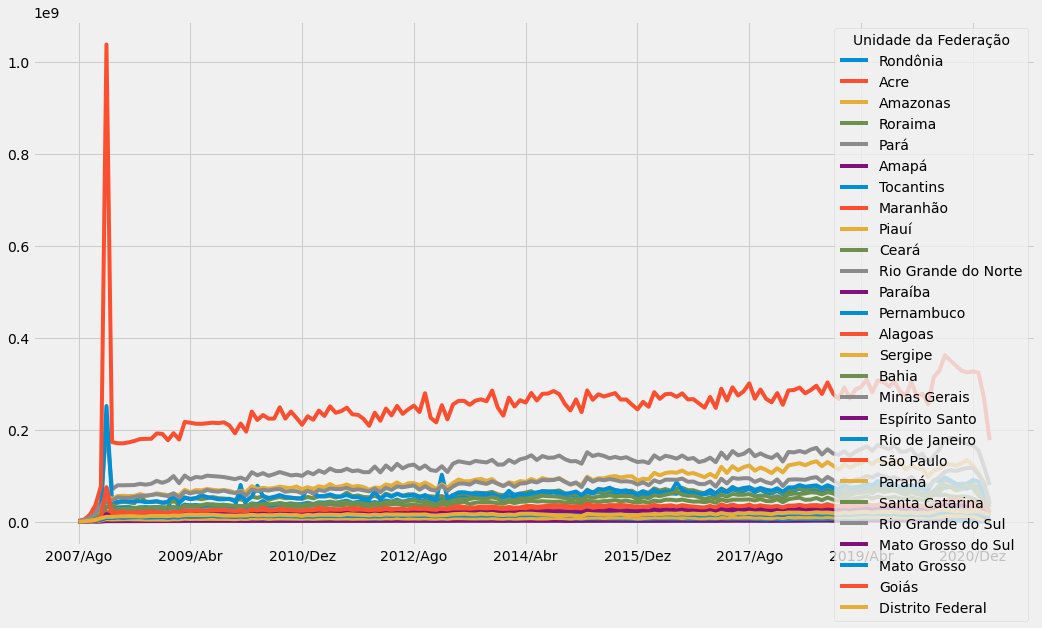

In [216]:
usaveis.T.plot(figsize = (16,9))


# Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

# Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

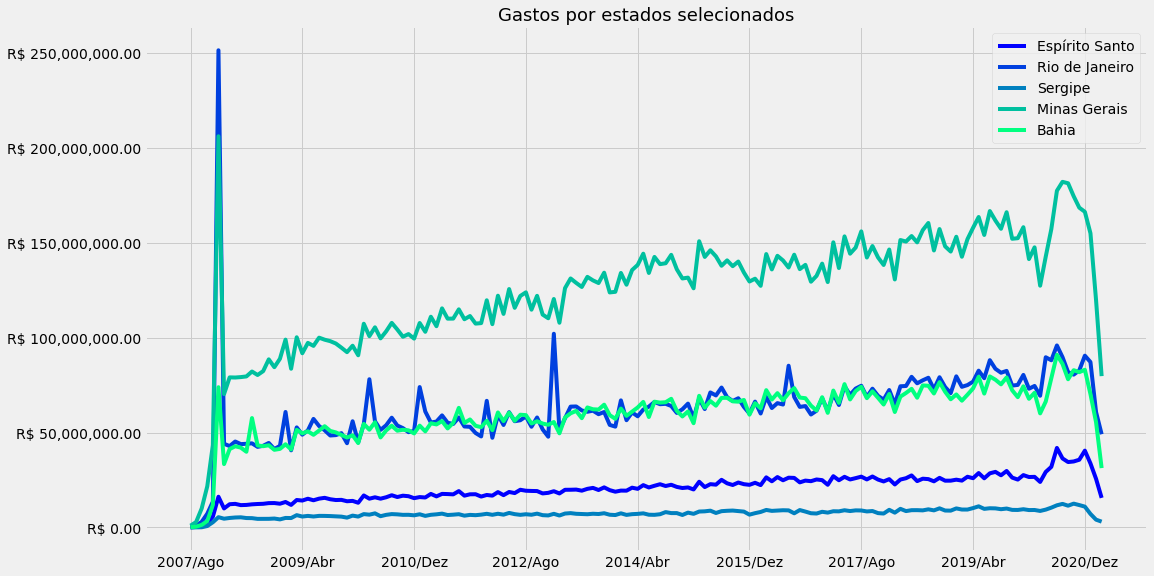

In [261]:
estados = ['Espírito Santo', 'Rio de Janeiro', 'Sergipe', 'Minas Gerais', 'Bahia']
selecionados = usaveis.loc[estados]

ax = selecionados.T.plot(
    y = estados,
    kind = 'line',
    figsize = (16,9),
    cmap = 'winter',    
)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.set_xlabel('')

plt.title('Gastos por estados selecionados', fontsize = 18)
plt.legend(loc='upper right')
plt.show()

## Fazendo agora pelo plotly por ter uma interface mais agradável e também pela responsividade

In [328]:
import plotly.express as px

estados = ['Espírito Santo', 'Rio de Janeiro', 'Sergipe', 'Minas Gerais', 'Bahia']
selecionados = usaveis.loc[estados]
selecionados = selecionados.T

fig = px.line(
    selecionados, x =selecionados.index, y=selecionados.columns,
    labels = {'value':'Valor em Reais','index':'Período (Ano/Mês)'},
    width = 1400, height = 600)

fig.update_layout(
    title={
        'text': "Gasto por Estados",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()